### Licture du fichier CSV via Pandas

In [100]:
import pandas as pd
import numpy as np
mower_market=pd.read_csv('mower_market_snapshot.csv',sep=',')

### Appliquer le maximum de fonctions sur les données CSV 

In [ ]:
type(mower_market)

In [ ]:
mower_market.head()

In [ ]:
mower_market.tail()

In [ ]:
series=pd.Series([mower_market])
series

In [ ]:
dataframe=pd.DataFrame(mower_market)
dataframe

In [ ]:
type(dataframe)

In [ ]:
mower_market.shape

In [ ]:
dataframe.shape

In [ ]:
dataframe=pd.DataFrame(np.array(mower_market))
dataframe

In [ ]:
dataframe.head(2)

In [ ]:
dataframe.tail(1)

In [ ]:
dataframe.describe()

In [ ]:
mower_market.describe()

In [ ]:
mower_market.head(0)

In [ ]:
dataframe.iloc[:20,:8]

In [ ]:
mower_market.iloc[:20,:8]

In [ ]:
mower_market[-5:]

In [ ]:
dataframe.rename(columns=lambda c: chr(65+c))

In [ ]:
mower_market.loc[:5,'capacity':'margin']

In [ ]:
mower_market.loc[:5,('capacity','margin')]

In [ ]:
mower_market.loc[:,['capacity','margin']]

In [ ]:
mower_market.loc[:,['capacity','margin']].iloc[0:5]

In [ ]:
mower_market.loc[mower_market.index[3],'margin']

In [ ]:
mower_market.sort_values(by='capacity',ascending=False).head()

In [ ]:
mower_market.loc[mower_market['capacity']>1,:]

### Auditer et analyser la colonnes Prod_cost

In [ ]:
mower_market['prod_cost']

In [ ]:
#On remarque une valeur unknown on fait dont un test sur les valeur de la colonne prod_cost:
    #Comme le type est par defaut str nous feront un caste vers float et nous determinerons les valeurs non caster
    #en renvoyant le numero de ligne.
tab=mower_market['prod_cost']    
indx_errno=[]
maximum=0
minimum=0

for i in range(len(tab)):
    try:
        res=float(tab[i])
        if minimum > res :
            minimum=res
        elif maximum < res:   
            maximum=res
    except:
        indx_errno.append(i)
        
print('\nIncorrect values= \n',tab[indx_errno])

print('\nMax= ',maximum)
print('Min= ',minimum)

In [ ]:
#les valeurs null
print(mower_market.loc[mower_market['prod_cost']=='0',:])

In [ ]:
#les valeurs null
print(mower_market.loc[mower_market['prod_cost']<'0',:])

### Analyser le nombre de valeurs manquantes par colonne

In [ ]:
for i in mower_market.columns:
    print(i+"  =>  "+str(mower_market[i].isnull().sum()))

### Remplacer les valeurs manquantes par la moyenne de la colonne

In [ ]:
mower_market['capacity'].mean()

In [ ]:
tab_nan=mower_market['prod_cost'].isnull()
mower_market['prod_cost'][tab_nan]

In [ ]:
#Ce n'est pas possible car la colonne comprend des valeur incorrecte


### Afficher les valeurs uniques de la colonne Warranty 

In [ ]:
mower_market['warranty'].unique()

### Finir d'explorer la colonne prod_cost

In [ ]:
#depuis notre analyse sur la colonne prod_cost nous constatant:
    #un certain nombre de valeur null
print('Nombre de valeurs null = ',18)
    #un certain nombre de valeur 'unknow'
print('Nombre de valeurs unknow =',len(indx_errno))
    #un certain nombre de valeur negative 
print('Nombre de valeurs negatives =',len(mower_market.loc[mower_market['prod_cost']<'0',:]))

### Vérifier sa cohérence et si possible la modifier en conséquence

In [ ]:
# pour que les valeurs soient coherentes on fixes les valeurs null les valeurs nom numerique 
#et les valeur negatives a O
mower_market=mower_market.replace(to_replace ='unknown' , value =np.nan)
mower_market=mower_market.replace(to_replace ='-64' , value =np.nan)
mower_market

In [662]:
moy=mower_market['prod_cost'][mower_market.prod_cost.notnull()].astype('float64').median()

In [ ]:
mower_market=mower_market.replace(to_replace =np.nan , value =moy)
mower_market

### Traiter la colonne warranty afin d'obtenir une colonne numérique avec 3 valeurs uniques

In [ ]:
mower_market['warranty'].unique()

In [257]:
for i in range(len(mower_market['warranty'])):
    if mower_market.loc[mower_market.index[i], 'warranty'].find('1')!=-1:
        mower_market.loc[mower_market.index[i], 'warranty']=1
    elif mower_market.loc[mower_market.index[i], 'warranty'].find('2')!=-1:
        mower_market.loc[mower_market.index[i], 'warranty']=2
    else:
        mower_market.loc[mower_market.index[i], 'warranty']=3

In [ ]:
mower_market['warranty'].unique()

In [ ]:
mower_market['warranty']

### Traiter la colonne price afin d'avoir 3 catégories : 

In [ ]:
mower_market['price']

In [351]:
cat_price={'0-300':mower_market.loc[(mower_market['price'] >=0) & (mower_market['price']<=300),:]['price']
           ,'301-500':mower_market.loc[(mower_market['price'] >=301) & (mower_market['price']<=500),:]['price']
           ,'501-++':mower_market.loc[mower_market['price'] >500,:]['price']}


### Transformer la colonne product_type en colonne numérique avec 3 catégories :

In [34]:
mower_market2=mower_market.copy()

In [ ]:
mower_market2['product_type'].unique()

In [36]:
mower_market2=mower_market2.replace()

In [52]:
for i in range(len(mower_market['product_type'])):
    if mower_market.loc[mower_market.index[i], 'product_type'].find('auto-portee')!=-1:
        mower_market.loc[mower_market.index[i], 'product_type']=1
    elif mower_market.loc[mower_market.index[i], 'product_type'].find('electrique')!=-1:
        mower_market.loc[mower_market.index[i], 'product_type']=2
    else:
        mower_market.loc[mower_market.index[i], 'product_type']=3

In [ ]:
mower_market['product_type'].unique()

### Puis créer 3 colonnes (auto-portée, essence, électrique) représentant une variable binaire avec 1 si le produit est du type de la colonne ou 0 sinon. 

In [55]:
mower_market = mower_market.drop(['auto-portee','electrique','essence'], axis=1, errors='ignore')
mower_market.insert(7, "auto-portee", mower_market['product_type']==1, True) 
mower_market.insert(8, "electrique", mower_market['product_type']== 2 , True) 
mower_market.insert(9, "essence", mower_market['product_type']==3, True) 
mower_market

# Géneralisation

La colonne [ prod_cost ]contient plusieurs types:



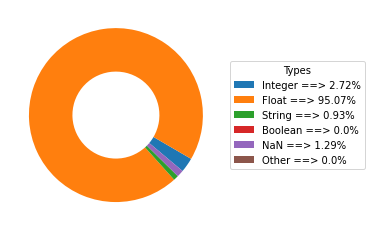


Voulez vous traiter ces données en [ Float ] O/N "choisir q pour quiter"


In [ ]:
import pandas as pd
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
mower_market=pd.read_csv('mower_market_snapshot.csv',sep=',')
cons1=['auto-portee', 'electrique', 'essence']
cons2=['1','2','3']
cons3=['Low', 'Medium', 'Hight']
########################################################################################################
def value_missing(x):
    return sum(x.isnull())
########################################################################################################
def max_percentage(dico=""):
    dico_max={'percentage':[]}
    l1=[]
    l2=[]
    try:
        for key,val in dico.items():
            l1.append(val['percentage'])
            l2.append(key)
        dico_max=dict(zip(l2, l1))
    except:
        print('[Data] incorrect')
    return dico_max
########################################################################################################
def add_column(data=""):
    try:
        data = data.drop(['auto-portee','electrique','essence'], axis=1, errors='ignore')
        data.insert(7, "auto-portee", data['product_type']==1, True) 
        data.insert(8, "electrique", data['product_type']== 2 , True) 
        data.insert(9, "essence", data['product_type']==3, True) 
    except:
        print("[Data] incorrecte")
########################################################################################################

def max_val(data=""):
    maxi = 0
    res=""
    try:
        for k,v in data.items():
            if v > maxi:
                maxi=v
                res=k
    except:
        print("[Data] incorrecte")
    return res
########################################################################################################
def choix_colmun(val="",col_name=""):
    ind=0
    result=""
    if(val!="" and col_name!=""):
        go_out=0
        print('Vous devez Changer la valeur :"',val,'" parmis les valeur suivantes:')
        while go_out!=1:
            try:
                for v in col_name:
                    print(v," O/N")
                    ok=0
                    while ok!=1:
                        res=input()
                        if res=='N' or res=='n':
                            ok=1
                            ind+=1
                            if ind==len(col_name):
                                print('Vous devez choisir une valeur')
                        elif res=='O' or res=='o':
                            result=v
                            go_out=1

                            ok=1
                        else:
                            print('Erreur de saisie ressayez')

                    if go_out==1:
                        break
            except:
                print("[Valeur] ou [Colonne] incorrecte")
    else:
        print("Vous devez entrer [Valeur] et [Colonne]")
    return result
########################################################################################################
def major_type(data=""):
    dic={}
    try:
        for col_name in data.columns:
            inte,flo,pos,neg,zero,intpos,intneg,intzero=0,0,0,0,0,0,0,0
            string,boolean,null,other,fperpos=0,0,0,0,0
            iperpos,fperneg,iperneg,fperzero,iperzero=0,0,0,0,0
            tab=data[col_name]
            per=len(tab)
            for val in data[col_name]:
                try:  
                    if float(val) > 0:
                        try:
                            if len(str(int(val)))==len(str(val)):
                                inte +=1
                                intpos+=1
                            else:
                                flo +=1
                                pos+=1
                        except:
                            flo +=1
                            pos+=1
                    elif float(val) < 0:
                        try:
                            if len(str(int(val)))==len(str(val)):
                                inte +=1
                                intneg+=1
                            else:
                                flo +=1
                                neg+=1
                        except:
                            flo +=1
                            neg+=1
                    elif float(val) == 0:
                        try:
                            if len(str(int(val)))==len(str(val)):
                                inte +=1
                                intzero+=1
                            else:
                                flo +=1
                                zero+=1
                        except:
                            flo +=1
                            zero+=1   
                    elif isnan(float(val)):
                        null+=1
                except:
                    try:
                        if type(val)==str:
                            if val=='True' or val=='False':
                                boolean+=1
                            else:
                                string+=1
                    except:
                        other+=1
            if inte!=0:
                iperpos=intpos/inte
                iperneg=intneg/inte
                iperzero=intzero/inte
            elif flo!=0:
                iperpos=pos/flo
                iperneg=neg/flo
                iperzero=zero/flo
            elif per==0:
                per=1
            dic.update({col_name:{'Integer':{'nb':inte,'percentage':(inte/per)*100,'positive':iperpos*100,
                                           'negative':iperneg*100,'zero':iperzero*100}}})
            dic[col_name].update({'Float':{'nb':flo,'percentage':(flo/per)*100,'positive':fperpos*100,
                                           'negative':fperneg*100,'zero':fperzero*100}})
            dic[col_name].update({'String':{'nb':string,'percentage':(string/per)*100}})
            dic[col_name].update({'Boolean':{'nb':boolean,'percentage':(boolean/per)*100}})
            dic[col_name].update({'NaN':{'nb':null,'percentage':(null/per)*100}})
            dic[col_name].update({'Other':{'nb':other,'percentage':(other/per)*100}})

    except:
        print('[Data] incorrect')
    
    return dic
########################################################################################################
def nan_to_value(*args):
    if((len(args)!=0) or (len(args)!=1)):
        try:
            data=args[0].copy()
            col_name=str(args[1])
            data_col=data[col_name]
            med=data[col_name][data[col_name].notnull()].astype('float64').median()
            for i in range(len(data_col)):
                #args[0]=args[0].replace(to_replace=np.nan ,value=med)
                try:
                    if isnan(args[0].loc[args[0].index[i], col_name]):
                        args[0].loc[args[0].index[i], col_name]=med
                except:
                    args[0].loc[args[0].index[i], col_name]=args[0].loc[args[0].index[i], col_name]
        except:
            print("[Data] ou [Colonne] incorrecte")
    else:
        print("Vous devez entrer [Data] et [Colonne]")
########################################################################################################
def filter_values_float(*args):
    if((len(args)!=0) or (len(args)!=1)):
        try:
            data=args[0].copy()
            col_name=str(args[1])
            data_col=data[col_name]
            for i in range(len(data_col)):
                try:
                    float(data_col[i])
                    if float(data_col[i])<0:
                        args[0].loc[args[0].index[i], col_name]=np.nan
                except:
                    args[0].loc[args[0].index[i], col_name]=np.nan
        except:
            print("[Data] ou [Colonne] incorrecte")
    else:
        print("Vous devez entrer [Data] et [Colonne]")
########################################################################################################
def filter_values_str(*args):
    if((len(args)!=0) or (len(args)!=1)):
        try:
            data=args[0].copy()
            col_name=str(args[1])
            data_col=data[col_name]
            for i in range(len(data_col)):
                try:
                    if col_name=='product_type':
                        if str(args[0].loc[args[0].index[i], col_name]).find('auto-portee')!=-1:
                            args[0].loc[args[0].index[i], col_name]=1
                        elif str(args[0].loc[args[0].index[i], col_name]).find('electrique')!=-1:
                            args[0].loc[args[0].index[i], col_name]=2
                        elif str(args[0].loc[args[0].index[i], col_name]).find('essence')!=-1:
                            args[0].loc[args[0].index[i], col_name]=3
                        else:
                            try:
                                cons2.index(str(args[0].loc[args[0].index[i], col_name]))
                            except:
                                args[0].loc[args[0].index[i], col_name]=choix_colmun(str(args[0].loc[args[0].index[i], col_name]),cons1)
                    elif col_name=='quality':
                        try:
                            cons3.index(str(args[0].loc[args[0].index[i], col_name]))
                        except:
                            args[0].loc[args[0].index[i], col_name]=choix_colmun(str(args[0].loc[args[0].index[i], col_name]),cons3)
                    elif col_name=='warranty':
                        if str(args[0].loc[args[0].index[i], col_name]).find('1')!=-1:
                            args[0].loc[args[0].index[i], col_name]=1
                        elif str(args[0].loc[args[0].index[i], col_name]).find('2')!=-1:
                            args[0].loc[args[0].index[i], col_name]=2
                        elif str(args[0].loc[args[0].index[i], col_name]).find('3')!=-1:
                            args[0].loc[args[0].index[i], col_name]=3
                        else:
                            args[0].loc[args[0].index[i], col_name]=choix_colmun(str(args[0].loc[args[0].index[i], col_name]),cons2)  
                except:
                    print('Erreur:\n'+'Colone: '+col_name+'\n ligne:'+i)
                    #args[0].loc[args[0].index[i], col_name]=np.nan
        except:
            print("[Data] ou [Colonne] incorrecte")
    else:
        print("Vous devez entrer [Data] et [Colonne]")       
########################################################################################################
def splot_stat(tab=""):
    ig, ax = plt.subplots(figsize=(19, 4), subplot_kw=dict(aspect="equal"))

    types_val = []
    data=[]
    types_val=[]
    for key,val in tab.items():
        data.append(val)
        types_val.append(key+" ==> "+str(round(val,2))+"%")
 
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    ax.legend(wedges, types_val,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        

    plt.show()

########################################################################################################

def main(data=""):
    res=""
    go_out=0
    try:
        dic_col=major_type(data)
        for val in data.columns:
            if go_out==1:
                break
            max_per=max_percentage(major_type(data)[val])
            max_key=max_val(max_per)
            if max_per[max_key] !=100:
                print('La colonne [',val,']contient plusieurs types:\n')
                splot_stat(max_per)
                
                print('\nVoulez vous traiter ces données en [',max_key,'] O/N "choisir q pour quiter"')
                ok=0
                while ok!=1:
                    res=input()
                    if res=='q' or res=='q':
                        ok=1
                        go_out=1
                    else:
                        if res=='N' or res=='n':
                            ok=1
                        elif res=='O' or res=='o':
                            if max_key=='Float':
                                filter_values_float(data,val)
                                nan_to_value(data,val)
                                data['val'] = data['val'].astype('float64')
                                ok=1
                            elif max_key=='String':
                                print('')
                                filter_values_str(data,val)
                                data['val'] = data['val'].astype('string')
                                ok=1
                            elif max_key=='Integer':
                                filter_values_float(data,val)
                                nan_to_value(data,val)
                                data['val'] = data['val'].astype('int64')
                                try:
                                    for i in renage(len(data[val])):
                                        data.loc[data.index[i], val]=int(data[i])
                                except:
                                    print('Une erreur s\'est prosuite')
                                ok=1
                            elif max_key=='NaN':
                                try:
                                    for i in renage(len(data[val])):
                                        data.loc[data.index[i], val]=np.nan
                                except:
                                    print('Une erreur s\'est prosuite')
                            else:
                                pritn('Vous devez verifiez les donner de [Data] Clonne:',val)

                        else:
                            print('Erreur de saisie ressayez')
            else: 
                add_column(data)
    except:
         print("[Data] incorrecte")
main(mower_market)
mower_market